In [27]:
import torch
import torchvision
from alae import ALAE
import numpy as np

device = torch.device("cuda:0")

In [2]:
mnist_train = torchvision.datasets.MNIST(
    '/files/',
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
#         torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

mnist_test = torchvision.datasets.MNIST(
    '/files/',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
#         torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

In [3]:
batches = enumerate(test_loader)
batch_idx, (img_tensors, target_int) = next(batches)

In [4]:
img_tensors.shape

torch.Size([64, 1, 28, 28])

In [5]:
import matplotlib.pyplot as plt

def img_iter():
    fig = plt.figure()
    for i in range(32):
        plt.tight_layout()
        plt.imshow(img_tensors[i][0], cmap='gray', interpolation='none')
        plt.title("Ground Truth: {}".format(target_int[i]))
        plt.xticks([])
        plt.yticks([])
        yield fig.show()
ii = img_iter()

C:\Users\jerme\anaconda3\envs\alae\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


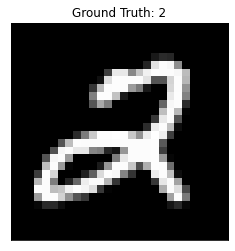

In [6]:
next(ii)

In [7]:
nn_input = torch.flatten(img_tensors, start_dim=1).to(device)

In [8]:
nn_input.shape

torch.Size([64, 784])

In [9]:
alae = ALAE().to(device)

In [10]:
train_hist, test_hist = alae.train(train_loader, test_loader)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:08<00:00, 34.45s/it]


In [11]:
train_hist

,loss_d,loss_g,loss_l,total_loss,epoch,step
0,1.384091,0.720452,0.410135,2.514678,0,0
1,1.498564,0.457291,0.180140,2.135996,0,50
2,1.106717,2.244968,0.141026,3.492712,0,100
3,0.587643,3.466774,0.132609,4.187025,0,150
4,0.845231,3.560330,0.158026,4.563586,0,200
5,0.218299,4.292563,0.155153,4.666015,0,250
6,0.032788,6.086048,0.100340,6.219176,0,300
7,0.317984,2.814320,0.095803,3.228106,0,350
8,0.788592,3.270352,0.110525,4.169469,0,400
9,0.569604,3.839161,0.126040,4.534805,0,450


In [17]:
idx = 10
_, (img_tensors, target) = next(enumerate(test_loader))
latent = alae.e(img_tensors[idx:idx + 1].reshape(1, 784).to(device))

In [18]:
latent

tensor([[-0.5407, -0.0464, -2.9564,  0.0314, -1.5389,  0.0923,  0.2709, -1.2598,
          1.2493,  3.2823,  0.5148, -1.2291, -2.2761,  0.9591,  0.6248,  0.8668,
         -0.7551, -0.0759, -0.4497,  0.7420, -1.5529,  0.1094, -0.0795,  0.6834,
          0.6150, -0.8763,  3.8834, -0.9034,  0.8540,  0.0394,  0.1213,  0.4808,
          0.1393, -1.0758, -2.0098, -0.8384, -0.4340,  1.7335,  0.2579,  0.1300,
         -0.8370, -3.6016,  3.0645, -0.0589,  1.1662,  0.2228,  0.0118,  0.8766,
          1.0326,  0.3071]], device='cuda:0', grad_fn=<AddmmBackward>)

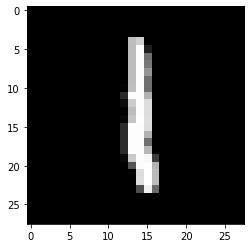

In [32]:
gen_img = alae.g(latent).detach().cpu().numpy().reshape(28, 28)
plt.imshow(np.clip(img_tensors[idx:idx + 1], 0, 1)[0][0], cmap='gray')

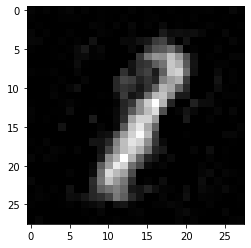

In [33]:
plt.imshow(np.clip(gen_img, 0, 1), cmap='gray')